In [103]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2018,1,2)
end = datetime.datetime(2021,1,18)
df= yf.download(tickers, start=start, end=end)
print(df)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
             Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2018-01-02   65.877853  51.647556  104.754112   41.442081   82.745354   
2018-01-03   67.554039  51.014027  105.702019   41.434864   84.040207   
2018-01-04   67.047279  51.335667  109.602280   41.627323   83.560951   
2018-01-05   68.119247  51.316177  110.767433   42.101261   85.015579   
2018-01-08   68.265442  50.809345  109.987381   41.944889   83.653427   
...                ...        ...         ...         ...         ...   
2021-01-11  128.149994  15.000000  171.020004  128.979996  107.759651   
2021-01-12  126.970001  15.380000  176.669998  128.800003  108.

In [104]:
import numpy as np
import pandas as pd

In [105]:
df = df['Adj Close']
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.877853,51.647556,104.754112,41.442081,82.745354,89.101776,192.490005,55.684303,146.372726,177.699997,...,64.657593,72.152405,65.490776,25.918779,65.562332,77.388687,121.132782,103.709999,46.599628,70.380058
2018-01-03,67.554039,51.014027,105.702019,41.434864,84.040207,89.433365,195.820007,55.807426,147.048264,181.039993,...,65.953041,73.569473,65.266426,25.883478,66.361748,77.322296,121.972481,105.769997,46.544483,70.703651
2018-01-04,67.047279,51.335667,109.602280,41.627323,83.560951,89.234398,199.250000,55.712711,148.789413,183.220001,...,67.143723,73.671303,65.256653,26.201174,66.804810,78.109459,121.796738,107.860001,46.737503,71.125328
2018-01-05,68.119247,51.316177,110.767433,42.101261,85.015579,90.314545,202.320007,55.873722,150.016815,185.339996,...,70.629974,73.611900,66.173569,26.395323,66.679596,78.564674,123.007484,109.540001,46.755882,71.939262
2018-01-08,68.265442,50.809345,109.987381,41.944889,83.653427,91.811577,207.800003,55.712711,151.215637,185.039993,...,71.096703,73.942833,66.622284,26.704195,66.920395,78.697456,123.241814,110.629997,46.526104,72.802223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,128.149994,15.000000,171.020004,128.979996,107.759651,107.349998,324.589996,110.395256,259.463379,474.239990,...,151.080002,46.840000,58.500000,23.440001,106.019997,107.669998,159.000000,413.790009,49.869999,169.127884
2021-01-12,126.970001,15.380000,176.669998,128.800003,108.510864,106.519997,324.670013,108.403282,257.519989,471.649994,...,146.669998,47.880001,59.950001,23.219999,105.830002,107.669998,159.830002,407.950012,50.360001,165.862946
2021-01-13,126.980003,15.530000,171.759995,130.889999,111.150002,105.620003,323.709991,111.700005,257.079987,472.049988,...,141.169998,48.419998,59.509998,22.940001,105.209999,107.150002,162.949997,412.450012,49.790001,161.699402


In [106]:
# drop tickers that didn't contain full data in the time range
df=df.drop([col for col in df.columns if np.isnan(df[col][0])==1], axis=1)
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.877853,51.647556,104.754112,41.442081,82.745354,89.101776,192.490005,55.684303,146.372726,177.699997,...,64.657593,72.152405,65.490776,25.918779,65.562332,77.388687,121.132782,103.709999,46.599628,70.380058
2018-01-03,67.554039,51.014027,105.702019,41.434864,84.040207,89.433365,195.820007,55.807426,147.048264,181.039993,...,65.953041,73.569473,65.266426,25.883478,66.361748,77.322296,121.972481,105.769997,46.544483,70.703651
2018-01-04,67.047279,51.335667,109.602280,41.627323,83.560951,89.234398,199.250000,55.712711,148.789413,183.220001,...,67.143723,73.671303,65.256653,26.201174,66.804810,78.109459,121.796738,107.860001,46.737503,71.125328
2018-01-05,68.119247,51.316177,110.767433,42.101261,85.015579,90.314545,202.320007,55.873722,150.016815,185.339996,...,70.629974,73.611900,66.173569,26.395323,66.679596,78.564674,123.007484,109.540001,46.755882,71.939262
2018-01-08,68.265442,50.809345,109.987381,41.944889,83.653427,91.811577,207.800003,55.712711,151.215637,185.039993,...,71.096703,73.942833,66.622284,26.704195,66.920395,78.697456,123.241814,110.629997,46.526104,72.802223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,128.149994,15.000000,171.020004,128.979996,107.759651,107.349998,324.589996,110.395256,259.463379,474.239990,...,151.080002,46.840000,58.500000,23.440001,106.019997,107.669998,159.000000,413.790009,49.869999,169.127884
2021-01-12,126.970001,15.380000,176.669998,128.800003,108.510864,106.519997,324.670013,108.403282,257.519989,471.649994,...,146.669998,47.880001,59.950001,23.219999,105.830002,107.669998,159.830002,407.950012,50.360001,165.862946
2021-01-13,126.980003,15.530000,171.759995,130.889999,111.150002,105.620003,323.709991,111.700005,257.079987,472.049988,...,141.169998,48.419998,59.509998,22.940001,105.209999,107.150002,162.949997,412.450012,49.790001,161.699402


In [107]:
stock_monthly_returns = df.resample('M').ffill().pct_change()

In [108]:
stock_monthly_returns.mean()

A       0.018278
AAL    -0.022848
AAP     0.015260
AAPL    0.037138
ABBV    0.008165
          ...   
YUM     0.011074
ZBH     0.010993
ZBRA    0.040297
ZION    0.005776
ZTS     0.022753
Length: 494, dtype: float64

In [109]:
# the higher the rank, the more returns
stock_monthly_returns.mean().rank(ascending=False)

A       117.0
AAL     494.0
AAP     159.0
AAPL     14.0
ABBV    312.0
        ...  
YUM     245.0
ZBH     247.0
ZBRA      9.0
ZION    355.0
ZTS      66.0
Length: 494, dtype: float64

In [110]:
stock_monthly_returns.std()

A       0.070539
AAL     0.141193
AAP     0.103063
AAPL    0.098739
ABBV    0.090907
          ...   
YUM     0.079888
ZBH     0.088047
ZBRA    0.117762
ZION    0.108339
ZTS     0.053721
Length: 494, dtype: float64

In [111]:
# the higher the rank, the less volatile
stock_monthly_returns.std().rank(ascending=True)

A       131.0
AAL     446.0
AAP     346.0
AAPL    326.0
ABBV    288.0
        ...  
YUM     204.0
ZBH     269.0
ZBRA    397.0
ZION    365.0
ZTS      34.0
Length: 494, dtype: float64

In [112]:
tickers = (stock_monthly_returns.mean().rank(ascending=False)+stock_monthly_returns.std().rank(ascending=True)).nsmallest(10).reset_index()['index']
tickers

0     NEE
1    MSFT
2     AWK
3     ZTS
4    COST
5      DG
6     DHR
7     TMO
8     BLL
9     STE
Name: index, dtype: object

In [113]:
df=df[tickers]
df

,NEE,MSFT,AWK,ZTS,COST,DG,DHR,TMO,BLL,STE
Date,,,,,,,,,,
2018-01-02,35.516525,82.383636,84.360161,70.380058,178.326767,91.219170,91.036125,191.439392,37.653549,85.578125
2018-01-03,34.763092,82.767044,83.763557,70.703651,180.466812,91.151291,92.247452,194.951141,37.556076,84.444313
2018-01-04,34.584469,83.495522,82.968071,71.125328,179.065369,92.218079,92.690620,197.391449,37.380619,83.911331
2018-01-05,34.742477,84.530701,82.153633,71.939262,177.786987,92.829041,93.271645,200.774277,37.614563,84.260193
2018-01-08,35.028736,84.616966,82.863884,72.802223,178.478241,91.555161,93.803459,201.101624,37.643799,86.062630
...,...,...,...,...,...,...,...,...,...,...
2021-01-11,79.690002,217.490005,156.639999,169.127884,364.010010,215.259995,244.119995,513.349976,90.559998,200.460007
2021-01-12,79.750000,214.929993,156.229996,165.862946,364.200012,218.380005,240.690002,498.769989,90.239998,192.059998
2021-01-13,81.839996,216.339996,159.690002,161.699402,366.950012,218.220001,239.839996,501.709991,91.089996,194.100006


In [114]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,NEE,MSFT,AWK,ZTS,COST,DG,DHR,TMO,BLL,STE
NEE,0.000297,0.000166,0.000244,0.000166,0.000106,0.000108,0.000141,0.000128,0.000180,0.000163
MSFT,0.000166,0.000411,0.000161,0.000249,0.000188,0.000157,0.000222,0.000235,0.000185,0.000209
AWK,0.000244,0.000161,0.000316,0.000161,0.000120,0.000117,0.000143,0.000136,0.000189,0.000162
ZTS,0.000166,0.000249,0.000161,0.000330,0.000142,0.000124,0.000196,0.000210,0.000195,0.000205
COST,0.000106,0.000188,0.000120,0.000142,0.000210,0.000131,0.000126,0.000136,0.000131,0.000118
DG,0.000108,0.000157,0.000117,0.000124,0.000131,0.000277,0.000115,0.000122,0.000124,0.000116
DHR,0.000141,0.000222,0.000143,0.000196,0.000126,0.000115,0.000262,0.000223,0.000154,0.000173
TMO,0.000128,0.000235,0.000136,0.000210,0.000136,0.000122,0.000223,0.000319,0.000175,0.000178
BLL,0.000180,0.000185,0.000189,0.000195,0.000131,0.000124,0.000154,0.000175,0.000334,0.000174
STE,0.000163,0.000209,0.000162,0.000205,0.000118,0.000116,0.000173,0.000178,0.000174,0.000301


In [115]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,NEE,MSFT,AWK,ZTS,COST,DG,DHR,TMO,BLL,STE
NEE,1.000000,0.475829,0.795178,0.530163,0.425941,0.374993,0.506753,0.416409,0.569431,0.546000
MSFT,0.475829,1.000000,0.446099,0.675815,0.638554,0.466108,0.677647,0.648933,0.498183,0.592345
AWK,0.795178,0.446099,1.000000,0.498840,0.464874,0.397198,0.497661,0.429780,0.582197,0.523603
ZTS,0.530163,0.675815,0.498840,1.000000,0.539681,0.409207,0.666610,0.646853,0.586502,0.648681
COST,0.425941,0.638554,0.464874,0.539681,1.000000,0.543757,0.538075,0.524252,0.494727,0.470920
DG,0.374993,0.466108,0.397198,0.409207,0.543757,1.000000,0.428487,0.408748,0.407571,0.400323
DHR,0.506753,0.677647,0.497661,0.666610,0.538075,0.428487,1.000000,0.772206,0.519405,0.614862
TMO,0.416409,0.648933,0.429780,0.646853,0.524252,0.408748,0.772206,1.000000,0.535008,0.574713
BLL,0.569431,0.498183,0.582197,0.586502,0.494727,0.407571,0.519405,0.535008,1.000000,0.548790
STE,0.546000,0.592345,0.523603,0.648681,0.470920,0.400323,0.614862,0.574713,0.548790,1.000000


In [116]:
# initialize weights
w = {}
for ticker in df.columns:
    w[ticker] = 1/len(df)

In [117]:
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

3.003229790781128e-08

In [118]:
month_returns = df.resample('M').ffill().pct_change().mean()
month_returns

NEE     0.023976
MSFT    0.025294
AWK     0.020907
ZTS     0.022753
COST    0.020054
DG      0.022427
DHR     0.026085
TMO     0.024720
BLL     0.026902
STE     0.022521
dtype: float64

In [119]:
quarter_returns = df.resample('Q').ffill().pct_change().mean()
quarter_returns

NEE     0.068263
MSFT    0.081338
AWK     0.062537
ZTS     0.062368
COST    0.064444
DG      0.076187
DHR     0.083603
TMO     0.084480
BLL     0.080127
STE     0.064681
dtype: float64

In [120]:
half_year_returns = df.resample('6M').ffill().pct_change().mean()
half_year_returns

NEE     0.148669
MSFT    0.157590
AWK     0.126389
ZTS     0.139834
COST    0.122591
DG      0.136109
DHR     0.158648
TMO     0.149754
BLL     0.169079
STE     0.137161
dtype: float64

In [121]:
year_returns = df.resample('Y').ffill().pct_change().mean()
year_returns

NEE     0.270913
MSFT    0.318999
AWK     0.229135
ZTS     0.263640
COST    0.248289
DG      0.274377
DHR     0.338224
TMO     0.324302
BLL     0.280204
STE     0.222881
dtype: float64

In [122]:
returns = pd.concat([month_returns,quarter_returns, half_year_returns,year_returns], axis=1) # Creating a table for visualising returns and volatility of assets
returns.columns = ['month_returns','quarter_returns', 'half_year_returns', 'year_returns']

In [123]:
returns = returns.sort_values(by=['year_returns','half_year_returns','quarter_returns','month_returns'],ascending=False)
print(returns.to_string())

      month_returns  quarter_returns  half_year_returns  year_returns
DHR        0.026085         0.083603           0.158648      0.338224
TMO        0.024720         0.084480           0.149754      0.324302
MSFT       0.025294         0.081338           0.157590      0.318999
BLL        0.026902         0.080127           0.169079      0.280204
DG         0.022427         0.076187           0.136109      0.274377
NEE        0.023976         0.068263           0.148669      0.270913
ZTS        0.022753         0.062368           0.139834      0.263640
COST       0.020054         0.064444           0.122591      0.248289
AWK        0.020907         0.062537           0.126389      0.229135
STE        0.022521         0.064681           0.137161      0.222881


In [124]:
# calculate (max-min)/mean as a way to measure volatility
(df.resample('Y').max()-df.resample('Y').min())/df.resample('Y').mean()


,NEE,MSFT,AWK,ZTS,COST,DG,DHR,TMO,BLL,STE
Date,,,,,,,,,,
2018-12-31,0.254611,0.314769,0.269449,0.280508,0.321816,0.320059,0.176632,0.268272,0.373165,0.359088
2019-12-31,0.376323,0.486180,0.373289,0.474025,0.408788,0.433538,0.423255,0.418141,0.571004,0.397348
2020-12-31,0.508915,0.503320,0.510015,0.568137,0.363264,0.470949,0.671760,0.710778,0.602255,0.548893
2021-12-31,0.104701,0.034118,0.061040,0.051074,0.048840,0.054393,0.088156,0.083709,0.021092,0.095049


In [125]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

NEE     0.270913
MSFT    0.318999
AWK     0.229135
ZTS     0.263640
COST    0.248289
DG      0.274377
DHR     0.338224
TMO     0.324302
BLL     0.280204
STE     0.222881
dtype: float64

In [28]:
# Portfolio returns
w = [0.2, 0.2, 0.2, 0.2,0.2]
port_er = (w*ind_er).sum()
port_er

0.26619510420407966

In [126]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

NEE     0.272655
MSFT    0.320590
AWK     0.280901
ZTS     0.287326
COST    0.229048
DG      0.263245
DHR     0.255863
TMO     0.282601
BLL     0.289100
STE     0.274511
dtype: float64

In [127]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['One_Year_Returns', 'Volatility']
assets

,One_Year_Returns,Volatility
NEE,0.270913,0.272655
MSFT,0.318999,0.320590
AWK,0.229135,0.280901
ZTS,0.263640,0.287326
COST,0.248289,0.229048
DG,0.274377,0.263245
DHR,0.338224,0.255863
TMO,0.324302,0.282601
BLL,0.280204,0.289100
STE,0.222881,0.274511


In [128]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [129]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [130]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol +' weight'] = [w[counter] for w in p_weights]

In [132]:
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,NEE weight,MSFT weight,AWK weight,ZTS weight,COST weight,DG weight,DHR weight,TMO weight,BLL weight,STE weight
0,0.269502,0.211697,0.049916,0.035813,0.154253,0.159612,0.079096,0.077693,0.135753,0.075304,0.069871,0.162687
1,0.283885,0.210445,0.093099,0.077093,0.064293,0.046196,0.076510,0.090712,0.237895,0.076268,0.088044,0.149890
2,0.269624,0.202326,0.148881,0.040356,0.122066,0.085432,0.164884,0.175174,0.095943,0.017884,0.093805,0.055574
3,0.268101,0.216537,0.132724,0.041741,0.157064,0.101782,0.017681,0.071211,0.006186,0.158562,0.153349,0.159699
4,0.284171,0.220212,0.177189,0.190775,0.027270,0.028091,0.069002,0.026756,0.077432,0.105361,0.181066,0.117059


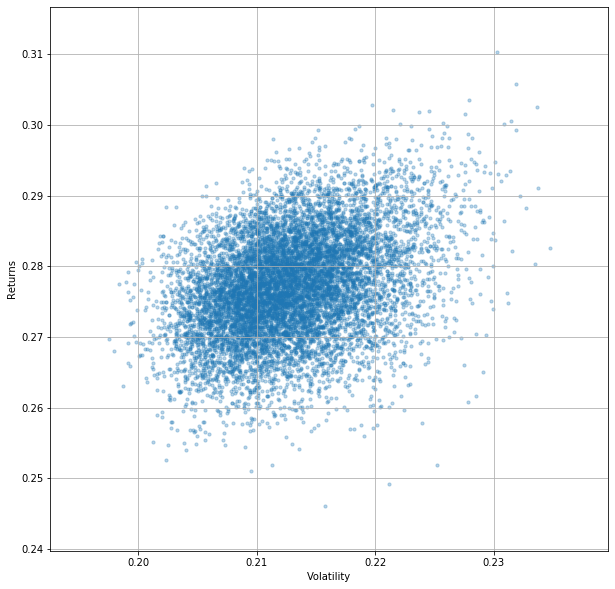

In [133]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [134]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.269714
Volatility     0.197556
NEE weight     0.088855
MSFT weight    0.008873
AWK weight     0.105649
ZTS weight     0.072779
COST weight    0.289852
DG weight      0.165078
DHR weight     0.150843
TMO weight     0.034432
BLL weight     0.023185
STE weight     0.060454
Name: 4202, dtype: float64

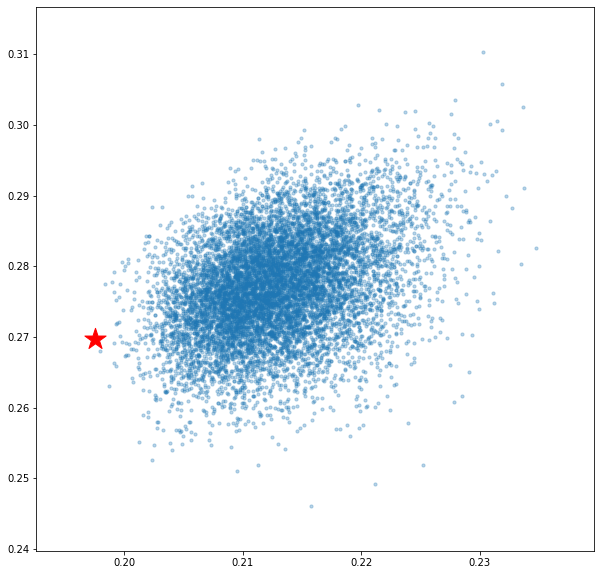

In [135]:
# plotting the minimum volatility portfolio
import matplotlib.pyplot as plt
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [136]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns        0.288397
Volatility     0.202314
NEE weight     0.120617
MSFT weight    0.003358
AWK weight     0.028218
ZTS weight     0.003531
COST weight    0.148481
DG weight      0.167887
DHR weight     0.204003
TMO weight     0.148881
BLL weight     0.140096
STE weight     0.034926
Name: 4770, dtype: float64

In [137]:
# sharpe ratio
((portfolios['Returns']-rf)/portfolios['Volatility'])[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]

1.376063565836429

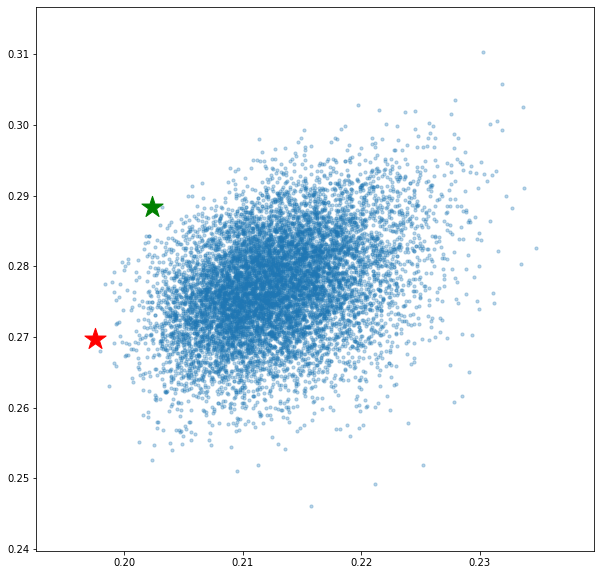

In [138]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [139]:
portfolios=portfolios.sort_values(by=['Returns','Volatility'],ascending=[False, True])

In [140]:
portfolios.loc[portfolios['Volatility']<0.28]

,Returns,Volatility,NEE weight,MSFT weight,AWK weight,ZTS weight,COST weight,DG weight,DHR weight,TMO weight,BLL weight,STE weight
3087,0.310241,0.230245,0.016169,0.205162,0.043727,0.020445,0.011008,0.065533,0.260712,0.247481,0.120916,0.008845
1437,0.305749,0.231830,0.011891,0.236683,0.000961,0.059415,0.164980,0.004073,0.219383,0.241691,0.050617,0.010306
5185,0.303536,0.227888,0.039146,0.110451,0.065458,0.030179,0.000454,0.017575,0.228762,0.265682,0.214070,0.028224
5145,0.302807,0.219706,0.029058,0.191822,0.016261,0.013950,0.164286,0.098987,0.241511,0.191626,0.049879,0.002620
9109,0.302460,0.233616,0.038754,0.263925,0.027640,0.012380,0.018852,0.037491,0.109201,0.198857,0.287816,0.005085
...,...,...,...,...,...,...,...,...,...,...,...,...
874,0.251914,0.211248,0.114839,0.007057,0.242036,0.082252,0.095198,0.096967,0.024985,0.061569,0.025018,0.250078
1970,0.251868,0.225204,0.081197,0.083739,0.207112,0.229211,0.036100,0.028162,0.012225,0.008355,0.030979,0.282921
2704,0.251076,0.209540,0.092172,0.005712,0.212144,0.093969,0.194673,0.036329,0.017999,0.025188,0.115390,0.206424
1040,0.249106,0.221170,0.001128,0.021115,0.273433,0.115611,0.017502,0.080001,0.010655,0.016275,0.179250,0.285030


In [141]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [144]:
mu = expected_returns.mean_historical_return(df,compounding =False)
mu

NEE     0.312983
MSFT    0.363840
AWK     0.249800
ZTS     0.314507
COST    0.259628
DG      0.311658
DHR     0.347597
TMO     0.358274
BLL     0.330491
STE     0.290522
dtype: float64

In [146]:
S = risk_models.sample_cov(df)
S

,NEE,MSFT,AWK,ZTS,COST,DG,DHR,TMO,BLL,STE
NEE,0.074908,0.041704,0.061558,0.041757,0.026925,0.027012,0.035499,0.032847,0.045597,0.041161
MSFT,0.041704,0.103359,0.040865,0.062075,0.047349,0.039604,0.055819,0.059468,0.046246,0.052008
AWK,0.061558,0.040865,0.079623,0.040586,0.030635,0.030096,0.036185,0.034678,0.047724,0.040886
ZTS,0.041757,0.062075,0.040586,0.082909,0.035649,0.030931,0.048992,0.052903,0.049133,0.051135
COST,0.026925,0.047349,0.030635,0.035649,0.053117,0.033233,0.031835,0.034214,0.033014,0.029744
DG,0.027012,0.039604,0.030096,0.030931,0.033233,0.070214,0.028909,0.030773,0.031345,0.029060
DHR,0.035499,0.055819,0.036185,0.048992,0.031835,0.028909,0.066111,0.056276,0.038584,0.043139
TMO,0.032847,0.059468,0.034678,0.052903,0.034214,0.030773,0.056276,0.080340,0.044126,0.044953
BLL,0.045597,0.046246,0.047724,0.049133,0.033014,0.031345,0.038584,0.044126,0.084590,0.043843
STE,0.041161,0.052008,0.040886,0.051135,0.029744,0.029060,0.043139,0.044953,0.043843,0.075660


In [147]:
ef = EfficientFrontier(mu,S)
ef

In [148]:
weights = ef.max_sharpe()
weights

OrderedDict([('NEE', 0.1612381044998098),
             ('MSFT', 0.0),
             ('AWK', 0.0),
             ('ZTS', 0.0),
             ('COST', 0.0309505585807655),
             ('DG', 0.2619835123917952),
             ('DHR', 0.3290266640020696),
             ('TMO', 0.1370301296063614),
             ('BLL', 0.0797710309191983),
             ('STE', 0.0)])

In [149]:
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('NEE', 0.16124),
             ('MSFT', 0.0),
             ('AWK', 0.0),
             ('ZTS', 0.0),
             ('COST', 0.03095),
             ('DG', 0.26198),
             ('DHR', 0.32903),
             ('TMO', 0.13703),
             ('BLL', 0.07977),
             ('STE', 0.0)])

In [150]:
ef.portfolio_performance(verbose =True)

Expected annual return: 34.2%
Annual volatility: 20.8%
Sharpe Ratio: 1.55


(0.34220965103134193, 0.20777876436814202, 1.5507342726345772)

In [151]:
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

In [152]:
portfolio_val = 10000
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value =portfolio_val)
allocation,leftover = da.lp_portfolio()
print("Discrete Allocaiton: ", allocation)
print("Funds Remaining: ", leftover)

Discrete Allocaiton:  {'NEE': 20, 'COST': 1, 'DG': 12, 'DHR': 14, 'TMO': 3, 'BLL': 7}
Funds Remaining:  2.8999176025390625


In [59]:
import bs4 as bs
import requests
import yfinance as yf
import datetime

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2018,1,2)
end = datetime.datetime(2021,1,18)
df= yf.download(tickers, start=start, end=end)
print(df)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
             Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
Date                                                                    
2018-01-02   65.877853  51.647556  104.754112   41.442081   82.745354   
2018-01-03   67.554039  51.014027  105.702019   41.434864   84.040207   
2018-01-04   67.047279  51.335667  109.602280   41.627323   83.560951   
2018-01-05   68.119247  51.316177  110.767433   42.101261   85.015579   
2018-01-08   68.265442  50.809345  109.987381   41.944889   83.653427   
...                ...        ...         ...         ...         ...   
2021-01-11  128.149994  15.000000  171.020004  128.979996  107.759651   
2021-01-12  126.970001  15.380000  176.669998  128.800003  108.

In [60]:
import numpy as np
import pandas as pd

In [61]:
df = df['Adj Close']
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.877853,51.647556,104.754112,41.442081,82.745354,89.101776,192.490005,55.684303,146.372726,177.699997,...,64.657593,72.152405,65.490776,25.918779,65.562332,77.388687,121.132782,103.709999,46.599628,70.380058
2018-01-03,67.554039,51.014027,105.702019,41.434864,84.040207,89.433365,195.820007,55.807426,147.048264,181.039993,...,65.953041,73.569473,65.266426,25.883478,66.361748,77.322296,121.972481,105.769997,46.544483,70.703651
2018-01-04,67.047279,51.335667,109.602280,41.627323,83.560951,89.234398,199.250000,55.712711,148.789413,183.220001,...,67.143723,73.671303,65.256653,26.201174,66.804810,78.109459,121.796738,107.860001,46.737503,71.125328
2018-01-05,68.119247,51.316177,110.767433,42.101261,85.015579,90.314545,202.320007,55.873722,150.016815,185.339996,...,70.629974,73.611900,66.173569,26.395323,66.679596,78.564674,123.007484,109.540001,46.755882,71.939262
2018-01-08,68.265442,50.809345,109.987381,41.944889,83.653427,91.811577,207.800003,55.712711,151.215637,185.039993,...,71.096703,73.942833,66.622284,26.704195,66.920395,78.697456,123.241814,110.629997,46.526104,72.802223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,128.149994,15.000000,171.020004,128.979996,107.759651,107.349998,324.589996,110.395256,259.463379,474.239990,...,151.080002,46.840000,58.500000,23.440001,106.019997,107.669998,159.000000,413.790009,49.869999,169.127884
2021-01-12,126.970001,15.380000,176.669998,128.800003,108.510864,106.519997,324.670013,108.403282,257.519989,471.649994,...,146.669998,47.880001,59.950001,23.219999,105.830002,107.669998,159.830002,407.950012,50.360001,165.862946
2021-01-13,126.980003,15.530000,171.759995,130.889999,111.150002,105.620003,323.709991,111.700005,257.079987,472.049988,...,141.169998,48.419998,59.509998,22.940001,105.209999,107.150002,162.949997,412.450012,49.790001,161.699402


In [62]:
# drop tickers that didn't contain full data in the time range
df=df.drop([col for col in df.columns if np.isnan(df[col][0])==1], axis=1)
df

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,65.877853,51.647556,104.754112,41.442081,82.745354,89.101776,192.490005,55.684303,146.372726,177.699997,...,64.657593,72.152405,65.490776,25.918779,65.562332,77.388687,121.132782,103.709999,46.599628,70.380058
2018-01-03,67.554039,51.014027,105.702019,41.434864,84.040207,89.433365,195.820007,55.807426,147.048264,181.039993,...,65.953041,73.569473,65.266426,25.883478,66.361748,77.322296,121.972481,105.769997,46.544483,70.703651
2018-01-04,67.047279,51.335667,109.602280,41.627323,83.560951,89.234398,199.250000,55.712711,148.789413,183.220001,...,67.143723,73.671303,65.256653,26.201174,66.804810,78.109459,121.796738,107.860001,46.737503,71.125328
2018-01-05,68.119247,51.316177,110.767433,42.101261,85.015579,90.314545,202.320007,55.873722,150.016815,185.339996,...,70.629974,73.611900,66.173569,26.395323,66.679596,78.564674,123.007484,109.540001,46.755882,71.939262
2018-01-08,68.265442,50.809345,109.987381,41.944889,83.653427,91.811577,207.800003,55.712711,151.215637,185.039993,...,71.096703,73.942833,66.622284,26.704195,66.920395,78.697456,123.241814,110.629997,46.526104,72.802223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,128.149994,15.000000,171.020004,128.979996,107.759651,107.349998,324.589996,110.395256,259.463379,474.239990,...,151.080002,46.840000,58.500000,23.440001,106.019997,107.669998,159.000000,413.790009,49.869999,169.127884
2021-01-12,126.970001,15.380000,176.669998,128.800003,108.510864,106.519997,324.670013,108.403282,257.519989,471.649994,...,146.669998,47.880001,59.950001,23.219999,105.830002,107.669998,159.830002,407.950012,50.360001,165.862946
2021-01-13,126.980003,15.530000,171.759995,130.889999,111.150002,105.620003,323.709991,111.700005,257.079987,472.049988,...,141.169998,48.419998,59.509998,22.940001,105.209999,107.150002,162.949997,412.450012,49.790001,161.699402


In [79]:
mu = expected_returns.mean_historical_return(df)
mu

A       0.238481
AAL    -0.323275
AAP     0.161793
AAPL    0.445978
ABBV    0.099897
          ...   
YUM     0.111173
ZBH     0.096143
ZBRA    0.570789
ZION    0.017616
ZTS     0.313721
Length: 494, dtype: float64

In [80]:
S = risk_models.sample_cov(df)
S

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,0.088258,0.065719,0.042317,0.059292,0.045524,0.047436,0.053037,0.055544,0.056282,0.065655,...,0.065756,0.049756,0.043114,0.059306,0.058092,0.037760,0.048683,0.069632,0.050450,0.053734
AAL,0.065719,0.454019,0.080074,0.068035,0.044173,0.059801,0.063703,0.043405,0.070941,0.053477,...,0.082143,0.114853,0.089021,0.150383,0.103531,0.083973,0.104640,0.093889,0.141992,0.053901
AAP,0.042317,0.080074,0.128693,0.049610,0.038916,0.049415,0.042571,0.038405,0.049025,0.052094,...,0.049962,0.050572,0.048373,0.074636,0.056103,0.046953,0.046214,0.057249,0.058958,0.047113
AAPL,0.059292,0.068035,0.049610,0.122940,0.046765,0.046948,0.062272,0.058184,0.065149,0.090416,...,0.079609,0.052065,0.040023,0.066626,0.058414,0.045233,0.049833,0.079978,0.045467,0.059782
ABBV,0.045524,0.044173,0.038916,0.046765,0.105415,0.048567,0.040361,0.047414,0.047161,0.052714,...,0.043641,0.043032,0.046285,0.048201,0.043842,0.032512,0.045131,0.049621,0.042404,0.045387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.037760,0.083973,0.046953,0.045233,0.032512,0.039162,0.034675,0.039485,0.050341,0.042301,...,0.040963,0.051286,0.046325,0.071058,0.050809,0.085008,0.057735,0.046493,0.047374,0.049678
ZBH,0.048683,0.104640,0.046214,0.049833,0.045131,0.049248,0.051464,0.046280,0.059179,0.048035,...,0.046781,0.068595,0.069815,0.094115,0.058133,0.057735,0.116650,0.058431,0.072641,0.050879
ZBRA,0.069632,0.093889,0.057249,0.079978,0.049621,0.055359,0.069217,0.058390,0.069301,0.086411,...,0.089095,0.065025,0.041866,0.091924,0.075617,0.046493,0.058431,0.182746,0.070898,0.062237
ZION,0.050450,0.141992,0.058958,0.045467,0.042404,0.056627,0.044253,0.036392,0.057080,0.034858,...,0.056617,0.091968,0.075427,0.108063,0.077516,0.047374,0.072641,0.070898,0.164795,0.036689


In [81]:
ef = EfficientFrontier(mu,S)
ef

In [86]:
weights = ef.min_volatility()
weights

OrderedDict([('A', 0.0),
             ('AAL', 0.0),
             ('AAP', 0.0),
             ('AAPL', 0.0),
             ('ABBV', 0.0),
             ('ABC', 0.0),
             ('ABMD', 0.0),
             ('ABT', 0.0),
             ('ACN', 0.0),
             ('ADBE', 0.0),
             ('ADI', 0.0),
             ('ADM', 0.0),
             ('ADP', 0.0),
             ('ADSK', 0.0),
             ('AEE', 0.0),
             ('AEP', 0.0),
             ('AES', 0.0),
             ('AFL', 0.0),
             ('AIG', 0.0),
             ('AIZ', 0.0),
             ('AJG', 0.0),
             ('AKAM', 0.0),
             ('ALB', 0.0),
             ('ALGN', 0.0),
             ('ALK', 0.0),
             ('ALL', 0.0),
             ('ALLE', 0.0),
             ('ALXN', 0.0),
             ('AMAT', 0.0),
             ('AMCR', 0.0),
             ('AMD', 0.0),
             ('AME', 0.0),
             ('AMGN', 0.0),
             ('AMP', 0.0),
             ('AMT', 0.0),
             ('AMZN', 0.0),
             ('AN

In [87]:
cleaned_weights = ef.clean_weights()
cleaned_weights

OrderedDict([('A', 0.0),
             ('AAL', 0.0),
             ('AAP', 0.0),
             ('AAPL', 0.0),
             ('ABBV', 0.0),
             ('ABC', 0.0),
             ('ABMD', 0.0),
             ('ABT', 0.0),
             ('ACN', 0.0),
             ('ADBE', 0.0),
             ('ADI', 0.0),
             ('ADM', 0.0),
             ('ADP', 0.0),
             ('ADSK', 0.0),
             ('AEE', 0.0),
             ('AEP', 0.0),
             ('AES', 0.0),
             ('AFL', 0.0),
             ('AIG', 0.0),
             ('AIZ', 0.0),
             ('AJG', 0.0),
             ('AKAM', 0.0),
             ('ALB', 0.0),
             ('ALGN', 0.0),
             ('ALK', 0.0),
             ('ALL', 0.0),
             ('ALLE', 0.0),
             ('ALXN', 0.0),
             ('AMAT', 0.0),
             ('AMCR', 0.0),
             ('AMD', 0.0),
             ('AME', 0.0),
             ('AMGN', 0.0),
             ('AMP', 0.0),
             ('AMT', 0.0),
             ('AMZN', 0.0),
             ('AN

In [88]:
ef.portfolio_performance(verbose =True)

Expected annual return: 102.0%
Annual volatility: 27.7%
Sharpe Ratio: 3.61


(1.0199999999999991, 0.2769823533315893, 3.610338304848069)

In [89]:
portfolio_val = 10000
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value =portfolio_val)
allocation,leftover = da.lp_portfolio()
print("Discrete Allocaiton: ", allocation)
print("Funds Remaining: ", leftover)

Discrete Allocaiton:  {'CHD': 3, 'CLX': 8, 'CMG': 1, 'DG': 1, 'DPZ': 1, 'DXCM': 1, 'ENPH': 11, 'LLY': 4, 'NEM': 2, 'TGT': 5, 'TSLA': 1, 'VZ': 7, 'WST': 2}
Funds Remaining:  33.92000198364258
